# Multi-tower quantum many-body scars in the PXP model

In [1]:
from tqdm.notebook import tqdm
import qutip as qt
import numpy as np
from importlib import reload
import scipy.sparse
import scipy as scp

import qims as qims
from matplotlib import pyplot as plt


## Setup of PXP model

In [ ]:
#System size
Nx = 12
eta = 0.636
print("-> Basis for full system")
bs, bs_ind = qims.basis(Nx, parallel = False)
print()

print("-> Generate PXP operators")
Sx, Sy, Sz, S2 = qims.pxp_operators(bs,bs_ind,Nx)
h = qims.pxp_hamiltonian(bs,bs_ind,Nx)

print((Sx-h/(2*eta)).norm())

## Use of translational invariance

In [ ]:
print("-> Generate momentum-space Hamiltonians and basis transformation")
Hs, U = qims.Hk(hamiltonian = Sx, 
            basis = bs, 
            basis_ind = bs_ind, 
            size = Nx,
            check_spect=True,
            check_symm=True)
print()

print("-> Calculate momentum eigenspectrum")
evals, evecs = qims.MomentumEigensystem(Hs, U, Nx)
print()


In [ ]:
v1=evecs_temp[0]
v2=evecs_temp[1]

In [ ]:
from scipy.sparse import hstack

In [ ]:
evals_temp, evecs_temp = Hs[k_list[0]].eigenstates()

zrs = evecs_temp[np.ix_(np.where(np.abs(evals_temp)<10**(-10))[0])]

vtemp = zrs[0]
for n in tqdm(range(1,len(zrs))):
    
    vtemp = hstack((vtemp, zrs[n].data))
evecs_set = qt.Qobj(vtemp)

In [ ]:
evecs_set

In [ ]:
S2_proj = (qt.Qobj(U[k_list[0]])*evecs_set).dag()*S2*qt.Qobj(U[k_list[0]])*evecs_set

In [ ]:
S2_proj.eigenstates()[1]

In [ ]:
np.diag((evecs_set.dag()*Hs[k_list[0]]*evecs_set).full())-evals_temp

In [ ]:
qt.Qobj(hstack((v1.data, v2.data))).full().T

In [ ]:
v1.full().T[0],v2.full().T[0],

In [ ]:
evals_temp, evecs_temp = Hs[k_list[0]].eigenstates()

In [ ]:
evals_temp

In [ ]:
zrs = evecs_temp[np.ix_(np.where(np.abs(evals_temp)<10**(-10))[0])]

In [ ]:
zrs[2].dag()*S2*zrs[2]

In [ ]:
evecs[k_list[0],1]

# Towers

In [ ]:
k_list = np.arange(0, Nx) / Nx
vs = qt.Qobj([evecs[k_list[0],n].full().T[0] for n in range(Hs[k_list[0]].shape[0])]).dag()
vs2 = qt.Qobj([evecs[k_list[int(Nx/2)],n].full().T[0] for n in range(Hs[k_list[int(Nx/2)]].shape[0])]).dag()

In [ ]:
np.sort(h.eigenenergies())

In [ ]:

TP = (Sz+1j*Sy)/2
# TP = (Sy+1j*Sz)/2
plt.imshow(np.abs((vs.dag()*TP*vs2).full()))

In [ ]:
plt.plot(np.abs((vs.dag()*TP*vs2).full())[0])

## Entanglementget_data

### Obtain open boundary conditions basis for entanglement entropy calculation

In [ ]:
bsl, bsl_ind = qims.PartBasis(Nx)

### Calculate entanglement entropy

In [ ]:
Hilbert_k_dims = {}
k_list = np.arange(0, Nx) / Nx
for K in k_list:
    Hilbert_k_dims[K] = Hs[K].shape[0]
S = qims.ent_entropy(Hilbert_k_dims,evecs, bs_ind, bsl, Nx)

In [84]:
S2_proj = (qt.Qobj(U[k_list[0]])*evecs_set).dag()*S2*qt.Qobj(U[k_list[0]])*evecs_set

In [88]:
S2_proj.eigenstates()[1]

array([Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
       Qobj data =
       [[-0.00179815]
        [-0.36580202]
        [ 0.39385982]
        [-0.77593656]
        [ 0.33012504]]                                              ,
       Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
       Qobj data =
       [[-0.49389705]
        [-0.55820869]
        [ 0.0642458 ]
        [ 0.01465865]
        [-0.66342021]]                                              ,
       Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
       Qobj data =
       [[ 0.78475076]
        [-0.40645833]
        [-0.35854726]
        [-0.11106927]
        [-0.27940179]]                                              ,
       Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
       Qobj data =
       [[-0.37398944]
        [-0.08253538]
        [-0.841983  ]
        [-0.27689883]
        [ 0.26021428]]                                              ,
       Quantum o

In [61]:
np.diag((evecs_set.dag()*Hs[k_list[0]]*evecs_set).full())-evals_temp

array([ 0.00000000e+00+0.j, -1.42108547e-14+0.j, -8.88178420e-16+0.j,
       -4.44089210e-15+0.j, -1.77635684e-15+0.j,  4.21884749e-15+0.j,
        1.11022302e-15+0.j,  4.21884749e-15+0.j, -7.99360578e-15+0.j,
       -3.55271368e-15+0.j, -3.55271368e-15+0.j,  4.21884749e-15+0.j,
       -1.33226763e-15+0.j,  8.25070234e-15+0.j,  9.90097050e-17+0.j,
       -4.77300778e-17+0.j, -1.24141596e-15+0.j, -2.67074125e-15+0.j,
        5.55111512e-16+0.j,  8.88178420e-16+0.j, -4.44089210e-16+0.j,
       -3.99680289e-15+0.j,  0.00000000e+00+0.j,  4.44089210e-16+0.j,
       -1.11022302e-15+0.j,  0.00000000e+00+0.j, -8.88178420e-16+0.j,
       -4.44089210e-16+0.j, -2.22044605e-15+0.j, -2.66453526e-15+0.j,
       -8.88178420e-16+0.j])

In [51]:
qt.Qobj(hstack((v1.data, v2.data))).full().T

array([[-0.20737098+0.j,  0.43358303+0.j, -0.30397007+0.j,
        -0.2496414 +0.j,  0.21548782+0.j, -0.26620287+0.j,
        -0.25960619+0.j,  0.17387232+0.j,  0.17387232+0.j,
        -0.18612528+0.j,  0.14455783+0.j,  0.18755289+0.j,
         0.18755289+0.j, -0.15339823+0.j,  0.18064502+0.j,
         0.15205573+0.j,  0.15205573+0.j, -0.12236031+0.j,
        -0.12024903+0.j, -0.12236031+0.j,  0.09596742+0.j,
        -0.10117673+0.j, -0.13510539+0.j, -0.10234315+0.j,
        -0.09488936+0.j, -0.10234315+0.j,  0.11087314+0.j,
         0.08322658+0.j, -0.03991689+0.j,  0.08096096+0.j,
        -0.03749618+0.j],
       [-0.12956052+0.j,  0.19336826+0.j,  0.01908064+0.j,
        -0.18637536+0.j, -0.2107495 +0.j,  0.06969835+0.j,
        -0.22029704+0.j,  0.13057326+0.j,  0.13057326+0.j,
         0.0600013 +0.j,  0.06511093+0.j, -0.23891742+0.j,
        -0.23891742+0.j,  0.3547502 +0.j,  0.15280102+0.j,
         0.09274183+0.j,  0.09274183+0.j, -0.03926893+0.j,
        -0.14497647+0.j, -0.03

In [44]:
v1.full().T[0],v2.full().T[0],

(array([-0.20737098+0.j,  0.43358303+0.j, -0.30397007+0.j, -0.2496414 +0.j,
         0.21548782+0.j, -0.26620287+0.j, -0.25960619+0.j,  0.17387232+0.j,
         0.17387232+0.j, -0.18612528+0.j,  0.14455783+0.j,  0.18755289+0.j,
         0.18755289+0.j, -0.15339823+0.j,  0.18064502+0.j,  0.15205573+0.j,
         0.15205573+0.j, -0.12236031+0.j, -0.12024903+0.j, -0.12236031+0.j,
         0.09596742+0.j, -0.10117673+0.j, -0.13510539+0.j, -0.10234315+0.j,
        -0.09488936+0.j, -0.10234315+0.j,  0.11087314+0.j,  0.08322658+0.j,
        -0.03991689+0.j,  0.08096096+0.j, -0.03749618+0.j]),
 array([-0.12956052+0.j,  0.19336826+0.j,  0.01908064+0.j, -0.18637536+0.j,
        -0.2107495 +0.j,  0.06969835+0.j, -0.22029704+0.j,  0.13057326+0.j,
         0.13057326+0.j,  0.0600013 +0.j,  0.06511093+0.j, -0.23891742+0.j,
        -0.23891742+0.j,  0.3547502 +0.j,  0.15280102+0.j,  0.09274183+0.j,
         0.09274183+0.j, -0.03926893+0.j, -0.14497647+0.j, -0.03926893+0.j,
        -0.14086582+0.j, -0

In [14]:
evals_temp, evecs_temp = Hs[k_list[0]].eigenstates()

In [20]:
evals_temp

array([-5.69413566e+00, -4.06458343e+00, -3.51811045e+00, -2.79715029e+00,
       -2.09573790e+00, -1.95289822e+00, -1.75941309e+00, -1.37004262e+00,
       -1.36167516e+00, -1.18652122e+00, -1.11180312e+00, -1.08844745e+00,
       -6.12474375e-01, -8.25070234e-15, -9.90097050e-17,  4.77300778e-17,
        1.24141596e-15,  2.67074125e-15,  6.12474375e-01,  1.08844745e+00,
        1.11180312e+00,  1.18652122e+00,  1.36167516e+00,  1.37004262e+00,
        1.75941309e+00,  1.95289822e+00,  2.09573790e+00,  2.79715029e+00,
        3.51811045e+00,  4.06458343e+00,  5.69413566e+00])

In [26]:
zrs = evecs_temp[np.ix_(np.where(np.abs(evals_temp)<10**(-10))[0])]

In [33]:
zrs[2].dag()*S2*zrs[2]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [12]:
evecs[k_list[0],1]

Quantum object: dims = [[322], [1]], shape = (322, 1), type = ket
Qobj data =
[[-0.12956052]
 [ 0.05582061]
 [ 0.05582061]
 [ 0.05582061]
 [ 0.00550811]
 [ 0.05582061]
 [-0.05380193]
 [ 0.00550811]
 [ 0.05582061]
 [ 0.02012018]
 [-0.05380193]
 [ 0.00550811]
 [-0.06083814]
 [ 0.05582061]
 [-0.06359428]
 [ 0.02012018]
 [-0.05380193]
 [ 0.03769325]
 [ 0.00550811]
 [ 0.03769325]
 [-0.06083814]
 [ 0.05582061]
 [ 0.02449543]
 [-0.06359428]
 [ 0.02012018]
 [-0.06896952]
 [-0.05380193]
 [ 0.01879591]
 [ 0.03769325]
 [ 0.00550811]
 [-0.06896952]
 [ 0.03769325]
 [-0.06083814]
 [ 0.10240756]
 [ 0.05582061]
 [-0.06359428]
 [ 0.02449543]
 [-0.06359428]
 [ 0.04410986]
 [ 0.02012018]
 [ 0.02677226]
 [-0.06896952]
 [-0.05380193]
 [ 0.02677226]
 [ 0.01879591]
 [ 0.03769325]
 [-0.01133596]
 [ 0.00550811]
 [ 0.04410986]
 [-0.06896952]
 [ 0.03769325]
 [-0.0418511 ]
 [-0.06083814]
 [-0.01133596]
 [ 0.10240756]
 [ 0.05582061]
 [ 0.02012018]
 [-0.06359428]
 [ 0.02449543]
 [-0.06896952]
 [-0.06359428]
 [ 0.02

# Towers

In [4]:
k_list = np.arange(0, Nx) / Nx
vs = qt.Qobj([evecs[k_list[0],n].full().T[0] for n in range(Hs[k_list[0]].shape[0])]).dag()
vs2 = qt.Qobj([evecs[k_list[int(Nx/2)],n].full().T[0] for n in range(Hs[k_list[int(Nx/2)]].shape[0])]).dag()

In [5]:
np.sort(h.eigenenergies())

array([-7.24294055e+00, -6.27437086e+00, -5.94212552e+00, -5.94212552e+00,
       -5.36335387e+00, -5.36335387e+00, -5.17015012e+00, -4.91144121e+00,
       -4.91144121e+00, -4.81869590e+00, -4.81869590e+00, -4.76737958e+00,
       -4.76737958e+00, -4.47747730e+00, -4.47747730e+00, -4.47503650e+00,
       -4.08114531e+00, -4.08114531e+00, -3.98960545e+00, -3.98960545e+00,
       -3.95158759e+00, -3.73008729e+00, -3.73008729e+00, -3.69350502e+00,
       -3.69350502e+00, -3.69326456e+00, -3.69326456e+00, -3.55797516e+00,
       -3.54822057e+00, -3.54822057e+00, -3.52231332e+00, -3.52231332e+00,
       -3.33283448e+00, -3.33283448e+00, -3.32718647e+00, -3.23608230e+00,
       -3.23608230e+00, -3.11105359e+00, -3.11105359e+00, -3.01121265e+00,
       -3.01121265e+00, -2.94676475e+00, -2.94676475e+00, -2.85475079e+00,
       -2.79024488e+00, -2.70301167e+00, -2.70301167e+00, -2.69218397e+00,
       -2.66577861e+00, -2.59694035e+00, -2.59694035e+00, -2.59010496e+00,
       -2.59010496e+00, -

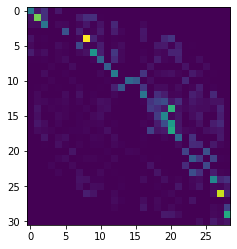

In [5]:

TP = (Sz+1j*Sy)/2
# TP = (Sy+1j*Sz)/2
plt.imshow(np.abs((vs.dag()*TP*vs2).full()))

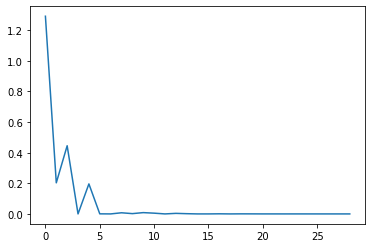

In [11]:
plt.plot(np.abs((vs.dag()*TP*vs2).full())[0])

## Entanglementget_data

### Obtain open boundary conditions basis for entanglement entropy calculation

In [6]:
bsl, bsl_ind = qims.PartBasis(Nx)

  0%|          | 0/11 [00:00<?, ?it/s]

### Calculate entanglement entropy

In [7]:
Hilbert_k_dims = {}
k_list = np.arange(0, Nx) / Nx
for K in k_list:
    Hilbert_k_dims[K] = Hs[K].shape[0]
S = qims.ent_entropy(Hilbert_k_dims,evecs, bs_ind, bsl, Nx)

Generating mapping between partial and full basis states for Schmidt decomposition:
Evaluate entanglement entropy for each momentum, eigenstate and sub-system size:


  0%|          | 0/12 [00:00<?, ?it/s]

### Plot entanglement entropy

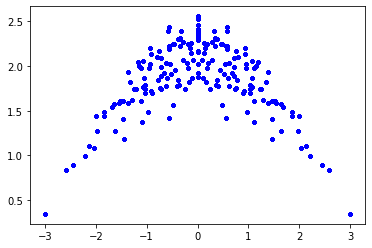

In [7]:
for k in k_list:
    for n in range(Hs[k].shape[0]): 
        plt.plot([evals[k,n]*0.826383 for n in range(Hs[k].shape[0])],\
                 [np.array(S[k,n,int(Nx/2)]) for n in range(Hs[k].shape[0])],'b.');

## Dynamics

### Operators

In [12]:
SZ = qims.sz_neel(size = Nx, basis = bs)

In [13]:
def psi_t(t, psi_0, evecs, evals, Hs):
    
    sm = 0
    for k in k_list:
        for n in range(Hs[k].shape[0]):
            sm = sm + np.exp(-1j*evals[k,n]*t)*(evecs[k,n]*psi_0.dag())*evecs[k,n]
    return sm
    

In [234]:
t_list = np.linspace(0,10,100)
scan = []
for t in tqdm(tlist):
    st = psi_t(t,qt.basis(len(bs),len(bs)-1), evecs,evals,Hs)
    scan.append(np.real((st.dag()*Sz*st).full()[0,0]))

  0%|          | 0/101 [00:00<?, ?it/s]

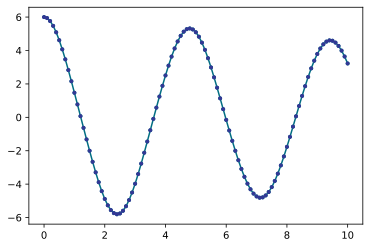

In [237]:
plt.plot(tlist,scan,'.')